In [1]:
#Install OPENCV
!pip install opencv-python
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

**Basic image processing**: Gray scale and color images

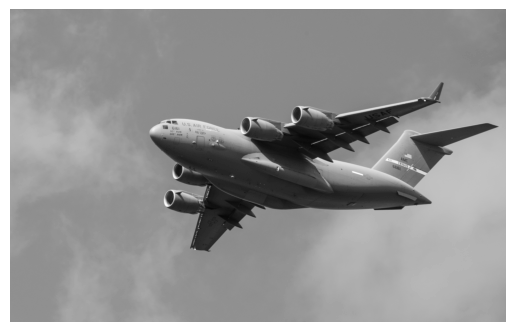

In [2]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("sim_data-master/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [3]:
# Fundamentally, images are data and when we use imread we convert that data into a 
# data type we are very familiar with—a NumPy array

# Show data type
type(image)

numpy.ndarray

In [4]:
#We have transformed the image into a matrix whose elements correspond to individual pixels. 
#We can even take a look at the actual values of the matrix:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [5]:
#The resolution of our image was 3600 × 2270, the exact dimensions of our matrix
# Show dimensions
image.shape

(2270, 3600)

In [6]:
#In grayscale images, the value of an individual element is the pixel intensity. 
#Intensity values range from black (0) to white (255).
# Show first pixel
image[0,0]

140

In [7]:
#In the matrix, each element contains three values corresponding to blue, green, red values (BGR)
# Load image in color
image_bgr = cv2.imread("sim_data-master/images/plane.jpg", cv2.IMREAD_COLOR)
# Show pixel
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

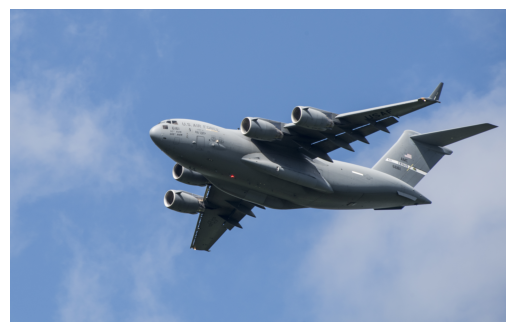

In [8]:
#One small caveat: by default OpenCV uses BGR, but many image applications—
#including Matplotlib—use red, green, blue (RGB), meaning the red and the blue
#values are swapped. To properly display OpenCV color images in Matplotlib, we need
#to first convert the color to RGB 

# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [9]:
# Show dimensions
image_rgb.shape

(2270, 3600, 3)

In [10]:
#SAVE images 
    
#Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("sim_data-master/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
# Save image
cv2.imwrite("sim_data-master/images/plane_new.jpg", image)

True

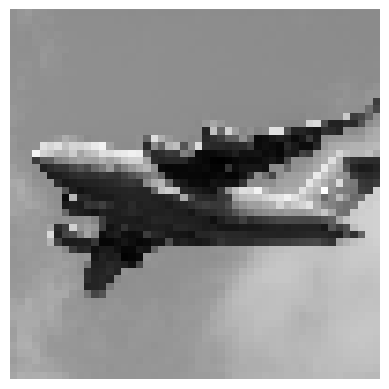

In [11]:
# Resizing Images

# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("sim_data-master/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

# NOTE: machine learning can require thousands or hundreds of thousands of images. When
#those images are very large they can take up a lot of memory, and by resizing them we
#can dramatically reduce memory usage. Some common image sizes for machine
#learning are 32 × 32, 64 × 64, 96 × 96, and 256 × 256.

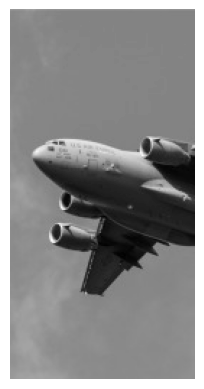

In [12]:
#Cropping Images

#Since OpenCV represents images as a matrix of elements, by selecting the rows and
#columns we want to keep we are able to easily crop the image. Cropping can be par‐
#ticularly useful if we know that we only want to keep a certain part of every image.

# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image in grayscale
image = cv2.imread("sim_data-master/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
# Select first half of the columns and all rows
image_cropped = image[:,:128]
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

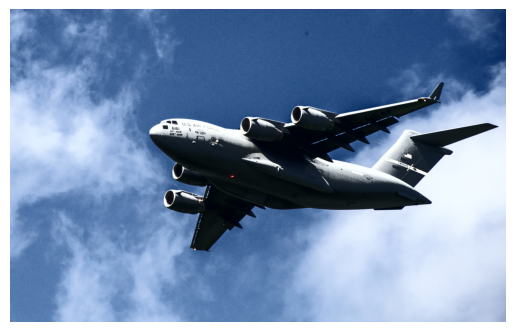

In [13]:
# Load image
image_bgr = cv2.imread("sim_data-master/images/plane.jpg")
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

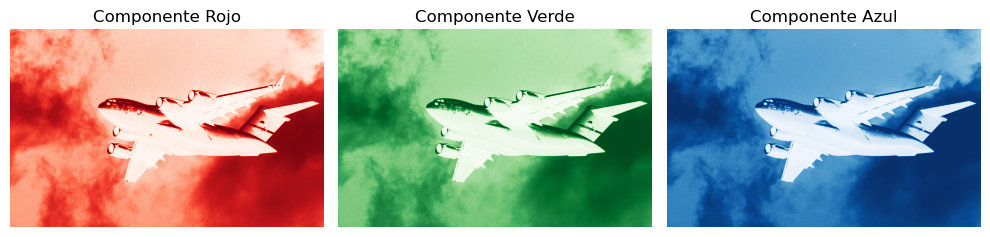

In [14]:
#Show RGB image components

imagen = image_rgb

# Dividir la imagen en sus componentes RGB
rojo = imagen[:, :, 0]
verde = imagen[:, :, 1]
azul = imagen[:, :, 2]

# Mostrar los componentes RGB
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(rojo, cmap='Reds')
plt.title('Componente Rojo')
plt.axis('off')

plt.subplot(132)
plt.imshow(verde, cmap='Greens')
plt.title('Componente Verde')
plt.axis('off')

plt.subplot(133)
plt.imshow(azul, cmap='Blues')
plt.title('Componente Azul')
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
#RGB to YUV

import colorsys

#Show RGB image components

imagen = image_rgb

def rgb_to_yuv(r, g, b):
    y, u, v = colorsys.rgb_to_yiq(r / 255.0, g / 255.0, b / 255.0)
    y *= 255
    u = (u + 0.595716) * 255
    v = (v + 0.522591) * 255
    return y, u, v

imagen = image_rgb

# Dividir la imagen en sus componentes RGB
r = imagen[:, :, 0]
g = imagen[:, :, 1]
b = imagen[:, :, 2]

r, g, b = 255, 0, 0  # Example RGB values
y, u, v = rgb_to_yuv(r, g, b)
print("YUV values:", y, u, v)


YUV values: 76.5 304.65258 187.575705


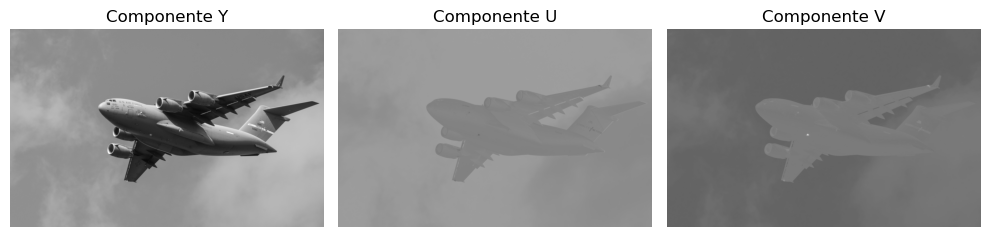

In [16]:
#RGB to YUV image
import cv2

# Load image
rgb_image = cv2.imread("sim_data-master/images/plane.jpg")

# Convert RGB image to YUV
yuv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2YUV)

# Save the YUV image
cv2.imwrite('output_yuv_image.jpg', yuv_image)
yuv_bgr = cv2.imread('output_yuv_image.jpg')

# Split YUV image into components
y_component, u_component, v_component = cv2.split(yuv_image)

# Save each YUV component as individual images
cv2.imwrite('y_component.jpg', y_component)
cv2.imwrite('u_component.jpg', u_component)
cv2.imwrite('v_component.jpg', v_component)

Y_bgr = cv2.imread('y_component.jpg')
Y_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
U_bgr = cv2.imread('u_component.jpg')
U_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
V_bgr = cv2.imread('v_component.jpg')
V_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Mostrar los componentes RGB
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(Y_bgr)
plt.title('Componente Y')
plt.axis('off')

plt.subplot(132)
plt.imshow(U_bgr)
plt.title('Componente U')
plt.axis('off')

plt.subplot(133)
plt.imshow(V_bgr)
plt.title('Componente V')
plt.axis('off')

plt.tight_layout()
plt.show()